# ベイズ線形回帰の実装

## やること

1. 観測データセットの作成 \
今回はsin波にガウスノイズを付加したデータセットを15プロット作成 \
$y_n = \mathrm{sin}(x_n) + \sigma_n^2 $ \
$\sigma_n^2 = \mathcal{N}(0,\sigma_n^2) $ \
つまり，  
$y_n = \mathcal{N}(\mathrm{sin}(x_n),\sigma^2) $ \
を基に観測データセットを作成する \
それを多項式： \
$\hat{\mu}={\bf w}_0^{\mathrm{T}} \cdot {\bf \hat{x_n}}^{3} + {\bf w}_1^{\mathrm{T}} \cdot {\bf \hat{x_n}}^{2} + {\bf w}_2^{\mathrm{T}} \cdot \hat{{\bf x_n}} + {\bf w}_3^{\mathrm{T}} \cdot 1$ \
$\hat{y_n} = \mathcal{N}(\hat{y_n}|\hat{\mu},\hat{\sigma^2}) $ \
で近似する
1. メインプログラム作成の流れ
    1. 観測データセットの作成
    1. 重み分布の更新プログラム
    1. 予測分布プログラム
    1. 結果を可視化するプログラム
    1. それらを呼び出すプログラム  

In [43]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## A. 観測データセットの作成 + 前処理

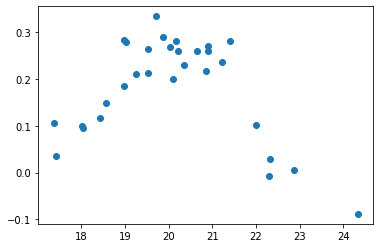

In [44]:
# 観測データセット
from dataset import ObservationData as OD

od = OD(20,2,30)
x, y = od.x_org, od.y_org
plt.scatter(x, y)

## B. 重み分布の更新プログラム

In [45]:
from weight import MultivariateNormalDistribution as mnd

w_mnd = mnd(4)

In [46]:
w_mnd.mean

array([[1.],
       [1.],
       [1.],
       [1.]])

In [47]:
w_mnd.cov

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [48]:
for i in range(30):
    w_mnd.update_params(x[i], y[i], 1)

## C. 予測分布プログラム

In [49]:
from model import NormalDistribution as nd

m_nd = nd(w_mnd)

In [50]:
m_nd.predict(od.x_range)

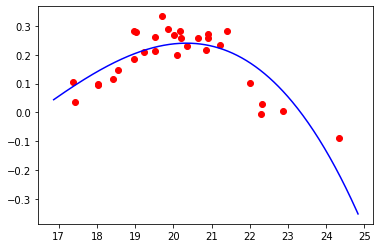

In [53]:
plt.plot(od.x_range, m_nd.posterior_mean, color='b')
plt.scatter(x, y, color='r')

## D. 結果を可視化するプログラム

In [106]:
import preprocessing as vz

## E. それらを呼び出すプログラム

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import visualization as vz
from dataset import ObservationData as OD
from weight import MultivariateNormalDistribution as mnd
from model import NormalDistribution as nd

OD_MEAN = 0 # int or float
OD_VAR = 1  # int or float
SAMPLING_NUM = 20 # int
TERM_NUM = 3     # int

def show_parameters():
    print("Mean of observation data : {}".format(OD_MEAN))
    print("Var of observation data  : {}".format(OD_VAR))
    print("Number of samples        : {}".format(SAMPLING_NUM))
    print("Number of terms          : {}".format(TERM_NUM))
    
def calc_variation(y_mean, y_var):
    y_min = y_mean - np.sqrt(y_var)
    y_max = y_mean + np.sqrt(y_var)
    return y_min, y_max

Mean of observation data : 0
Var of observation data  : 1
Number of samples        : 20
Number of terms          : 3


MovieWriter ffmpeg unavailable; using Pillow instead.


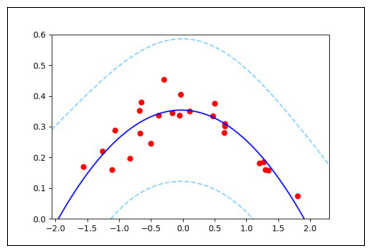

In [5]:
show_parameters()
    
od = OD(OD_MEAN, OD_VAR, SAMPLING_NUM)
w_mnd = mnd(TERM_NUM)
m_nd = nd(w_mnd)
x_org, y_org = od.x_org, od.y_org

for i in range(SAMPLING_NUM):
    w_mnd = mnd(TERM_NUM)
    for j in range(i+1):
        w_mnd.update_params(x_org[j], y_org[j], m_nd.init_sigma)

    m_nd = nd(w_mnd)
    m_nd.predict(od.x_range)

    y_mean = m_nd.posterior_mean
    y_min, y_max = calc_variation(y_mean, m_nd.posterior_sigma)

    vz.save_img(od.x_range, y_mean, y_min, y_max, x_org[:i+1], y_org[:i+1], i+1)

vz.save_gif()